# Приближенное решение краевой задачи для обыкновенного дифференциального уравнения

## Вариант 6

> <span style="font-style:normal; font-size:12pt;"> 
    <p>Найти приближенное решение краевой задачи для обычновенного дифференциального уравнения на отрезке [0, 1] с шагом h = 0.05. Для вычисления решения использовать метод прогонки с краевыми условиями первого и второго порядка точности.</p>
    <p> Для сравнения приведено точное решение u0(x) </p>
    
$$
\begin{equation}
u'' + \frac{2x}{1+x^2}u' + \frac{2xtgx}{1+x^2}u = \frac{2xtgx}{1+x^2}arctgx - cosx, \\
u(0) = 1, \\ u(1) + 2u'(1) = 0.6428, \\ u_0(x) = cosx + arctgx \\
\end{equation}
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Вычисление констант СЛАУ (апроксимация)
def SLE_constants(x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, bc_precision=1):
    
    if bc_precision != 1 and bc_precision != 2:
        return
    
    n = len(x_plot)
    h = x_plot[1] - x_plot[0]
    
    a_plot = []
    b_plot = []
    c_plot = []
    f_plot = []
    
    a0 = 0
    b0 = alpha1 - beta1 / h
    c0 = beta1 / h
    f0 = gamma1

    an = (-1)   * beta2 / h
    bn = alpha2 + beta2 / h
    cn = 0
    fn = gamma2

    if bc_precision == 2:
        if beta1 != 0 and beta2 != 0:
            b0 = -2 + 2 * h * alpha1 / beta1 - p(x_plot[0]) * np.power(h, 2) * alpha1 / beta1 + q(x_plot[0]) * np.power(h, 2)
            c0 = 2
            f0 = f(x_plot[0]) * np.power(h, 2) + 2 * gamma1 * h / beta1 - p(x_plot[0]) * np.power(h, 2) * gamma1 / beta1

            an = 2
            bn = -2 + (-2) * h * alpha2 / beta2 - p(x_plot[n - 1]) * np.power(h, 2) * alpha2 / beta2 + q(x_plot[n - 1]) * np.power(h, 2)
            fn = f(x_plot[n - 1]) * np.power(h, 2) - (2 * h * gamma2 / beta2 + p(x_plot[n - 1]) * np.power(h, 2) * gamma2 / beta2)
        
        elif beta1 != 0:
            b0 = -2 + 2 * h * alpha1 / beta1 - p(x_plot[0]) * np.power(h, 2) * alpha1 / beta1 + q(x_plot[0]) * np.power(h, 2)
            c0 = 2
            f0 = f(x_plot[0]) * np.power(h, 2) + 2 * gamma1 * h / beta1 - p(x_plot[0]) * np.power(h, 2) * gamma1 / beta1
            
        elif beta2 != 0:
            an = 2
            bn = -2 + (-2) * h * alpha2 / beta2 - p(x_plot[n - 1]) * np.power(h, 2) * alpha2 / beta2 + q(x_plot[n - 1]) * np.power(h, 2)
            fn = f(x_plot[n - 1]) * np.power(h, 2) - (2 * h * gamma2 / beta2 + p(x_plot[n - 1]) * np.power(h, 2) * gamma2 / beta2)

    a_plot.append(a0)
    b_plot.append(b0)
    c_plot.append(c0)
    f_plot.append(f0)

    for k in range(1, n - 1):
        ak =   1  / (h**2) - p(x_plot[k]) / (2 * h)
        bk = (-2) / (h**2) + q(x_plot[k])
        ck =   1  / (h**2) + p(x_plot[k]) / (2 * h)
        fk = f(x_plot[k])

        a_plot.append(ak)
        b_plot.append(bk)
        c_plot.append(ck)
        f_plot.append(fk)

    a_plot.append(an)
    b_plot.append(bn)
    c_plot.append(cn)
    f_plot.append(fn)
    
    return a_plot, b_plot, c_plot, f_plot

In [3]:
# Метод прогонки для решения СЛАУ
def Thomas_algorithm(a_plot, b_plot, c_plot, f_plot):
    n = len(f_plot)
    y_plot = []
        
    A_plot = []
    B_plot = []
    
    A0 = (-1) * c_plot[0] / b_plot[0]
    B0 = f_plot[0] / b_plot[0]
    
    A_plot.append(A0)
    B_plot.append(B0)
    
    for i in range(1, n - 1):
        Ai = (-1) * c_plot[i] / (b_plot[i] + a_plot[i] * A_plot[i - 1])
        A_plot.append(Ai)
    
    for i in range(1, n):
        Bi = (f_plot[i] - a_plot[i] * B_plot[i - 1]) / (b_plot[i] + a_plot[i] * A_plot[i - 1])
        B_plot.append(Bi)
    
    An = 0   
    A_plot.append(An)    
    
    y_plot.append(B_plot[n - 1])
    
    for i in range(n - 2, -1, -1):
        yi = B_plot[i] + A_plot[i] * y_plot[0]
        y_plot.insert(0, yi)
    
    return y_plot

In [4]:
# РЕШАЕМ КРАЕВУЮ ЗАДАЧУ ДЛЯ ОДУ ВТОРОГО ПОРЯДКА

def p(x):
    return 2 * x / (1 + x**2)

def q(x):
    return 2* x * np.tan(x) / (1 + x**2)

def f(x):
    return 2 * x * np.tan(x) / (1 + x**2) * np.arctan(x) - np.cos(x)

# точное решение для анализа
def u(x):
    return np.cos(x) + np.arctan(x)

def u_der(x):
    return (-1) * np.sin(x) + 1 / (1 + x**2)

# интервал
left = 0
right = 1

### Исходные данные

In [5]:
# шаг сетки
h = 0.05

# построение сетки
x_plot= np.linspace(left, right, round((right - left) / h) + 1)

print("Size of range: ", len(x_plot))
print(x_plot)

Size of range:  21
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [6]:
alpha1 = 1
alpha2 = 1

beta1 = 0
beta2 = 2

gamma1 = 1
gamma2 = 0.642758499649795

##### Краевые условия 1 и 2 порядков точности

In [7]:
a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants(x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants(x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)

In [8]:
d = {'a_plot1': a1_plot, 'b_plot1': b1_plot, 'c_plot1': c1_plot, 'f_plot1': f1_plot}

df = pd.DataFrame(d)
df

,a_plot1,b_plot1,c_plot1,f_plot1
0,0.000000,1.000000,0.000000,1.000000
1,399.002494,-799.995008,400.997506,-0.998501
2,398.019802,-799.980132,401.980198,-0.993024
3,397.066015,-799.955657,402.933985,-0.982169
4,396.153846,-799.922035,403.846154,-0.964677
5,395.294118,-799.879839,404.705882,-0.939476
6,394.495413,-799.829723,405.504587,-0.905708
7,393.763920,-799.772365,406.236080,-0.862734
8,393.103448,-799.708418,406.896552,-0.810112
9,392.515593,-799.638462,407.484407,-0.747569


### Численное решение

In [9]:
y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
u_plot  = [u(x) for x in x_plot]

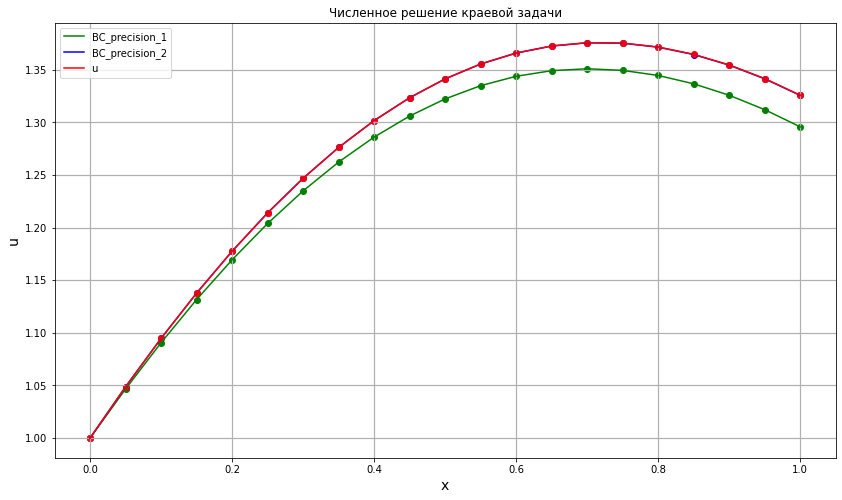

In [10]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(x_plot, y1_plot, color="green")
ax.plot   (x_plot, y1_plot, color="green", label='BC_precision_1')

ax.scatter(x_plot, y2_plot, color="blue")
ax.plot   (x_plot, y2_plot, color="blue", label='BC_precision_2')

ax.scatter(x_plot, u_plot, color="red")
ax.plot   (x_plot, u_plot, color="red", label='u')


ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("u", fontsize=14)

plt.title("Численное решение краевой задачи")
plt.legend()

plt.show()

In [11]:
d = {'x_plot': x_plot, 'y1_plot': y1_plot, 'y2_plot': y2_plot, 'u_plot': u_plot}

df = pd.DataFrame(d)
df

,x_plot,y1_plot,y2_plot,u_plot
0,0.00,1.000000,1.000000,1.000000
1,0.05,1.046653,1.048713,1.048709
2,0.10,1.090570,1.094681,1.094673
3,0.15,1.131531,1.137671,1.137661
4,0.20,1.169333,1.177473,1.177462
5,0.25,1.203801,1.213900,1.213891
6,0.30,1.234788,1.246799,1.246793
7,0.35,1.262182,1.276047,1.276048
8,0.40,1.285904,1.301558,1.301567
9,0.45,1.305909,1.323281,1.323301


#### Точность алгоритмов

In [12]:
# количество узлов сетки

node_min_count = 10
node_max_count = 1000

In [13]:
# вычисление ошибок

h_plot       = []
errors_plot1 = []
errors_plot2 = []

for n in np.arange(node_min_count, node_max_count + 1, step=10):    
    
    x0_plot, h = np.linspace(left, right, n, retstep=True)
    
    a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants(x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
    a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants(x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)
    
    y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
    y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
    u_plot  = [u(x) for x in x0_plot]
    
    max_error1 = max([abs(y1 - u) for y1, u in zip(y1_plot, u_plot)])
    max_error2 = max([abs(y2 - u) for y2, u in zip(y2_plot, u_plot)])
    
    h_plot.append(h)
    errors_plot1.append(max_error1)
    errors_plot2.append(max_error2)

In [14]:
d = {'h_plot': h_plot, 'errors_plot1': errors_plot1, 'errors_plot2': errors_plot2}

df = pd.DataFrame(d)
df.head(20)

,h_plot,errors_plot1,errors_plot2
0,0.111111,0.063506,0.001150
1,0.052632,0.031609,0.000257
2,0.034483,0.021055,0.000110
3,0.025641,0.015787,0.000061
4,0.020408,0.012628,0.000039
5,0.016949,0.010522,0.000027
6,0.014493,0.009019,0.000019
7,0.012658,0.007891,0.000015
8,0.011236,0.007014,0.000012
9,0.010101,0.006313,0.000009


In [15]:
ln_h_plot       = np.log(h_plot)
ln_errors_plot1 = np.log(errors_plot1)
ln_errors_plot2 = np.log(errors_plot2)

##### МНК для линейной регрессии

In [16]:
ln_errors_plot2 = ln_errors_plot2[:5]
ln_h_plot2      = ln_h_plot[:5]

ln_errors = [ln_errors_plot1, ln_errors_plot2]
b_order1  = 0
b_order2  = 0

    
# b_order1
for index in range(len(ln_h_plot)):
    b_order1 += ln_h_plot[index] * ln_errors[0][index]
b_order1 *= len(ln_h_plot)

b_order1 -= (np.sum(ln_h_plot) * np.sum(ln_errors[0]))
b_order1 /= (len(ln_h_plot)    * np.sum(np.power(ln_h_plot, 2)) - np.power(np.sum(ln_h_plot), 2))


# b_order2
for index in range(len(ln_h_plot2)):
    b_order2 += ln_h_plot2[index] * ln_errors[1][index]
b_order2 *= len(ln_h_plot2)

b_order2 -= (np.sum(ln_h_plot2) * np.sum(ln_errors[1]))
b_order2 /= (len(ln_h_plot2)    * np.sum(np.power(ln_h_plot2, 2)) - np.power(np.sum(ln_h_plot2), 2))


b_order = [b_order1, b_order2]
b_order

[0.9903387687224338, 2.0036646893902903]

##### График ошибок

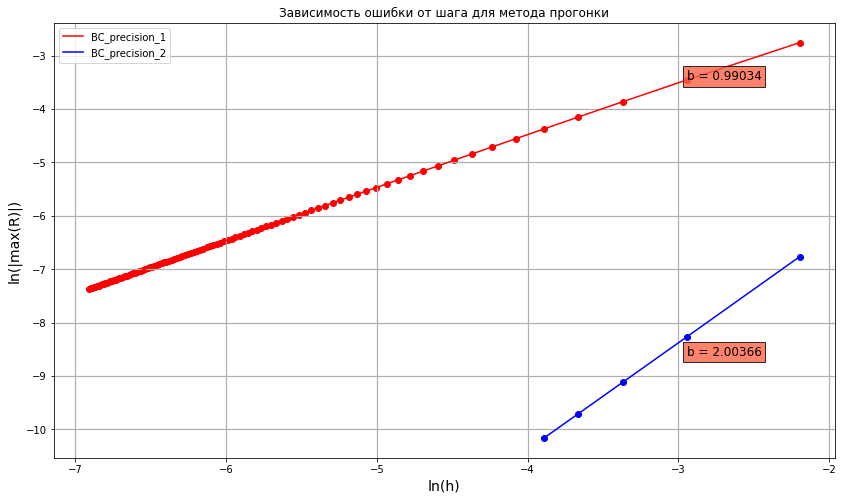

In [17]:
fig, ax = plt.subplots(figsize=(14, 8))

props = dict(boxstyle='square', facecolor='tomato', alpha=0.8)

ax.scatter(ln_h_plot,    ln_errors_plot1, color="red")
ax.plot   (ln_h_plot,    ln_errors_plot1, color="red", label='BC_precision_1')
plt.text  (ln_h_plot[1], ln_errors_plot1[1], "b = {0:.5f}".format(b_order[0]), fontsize = 12, bbox=props)

ax.scatter(ln_h_plot2,  ln_errors_plot2, color="blue")
ax.plot   (ln_h_plot2,  ln_errors_plot2, color="blue", label='BC_precision_2')
plt.text  (ln_h_plot2[1],  ln_errors_plot2[2] + 0.5, "b = {0:.5f}".format(b_order[1]), fontsize = 12, bbox=props)

ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("ln(h)", fontsize=14)        
ax.set_ylabel("ln(|max(R)|)", fontsize=14)

plt.title("Зависимость ошибки от шага для метода прогонки")
plt.legend()

plt.show()

#### Доп.условие

> <span style="font-style:normal; font-size:12pt;"> 
    <p>Найти приближенное решение краевой задачи для обычновенного дифференциального уравнения на отрезке [0, 1] с шагом h = 0.05. Для вычисления решения использовать метод прогонки с краевыми условиями первого и второго порядка точности.</p>
    <p> Для сравнения приведено точное решение u0(x) </p>
    
$$
\begin{equation}
u'' + \frac{2x}{1+x^2}u' + \frac{2xtgx}{1+x^2}u = \frac{2xtgx}{1+x^2}arctgx - cosx, \\
u'(0) = 1, \\ u(1) + 2u'(1) = 0.6428, \\ u_0(x) = cosx + arctgx \\
\end{equation}
$$

In [18]:
# шаг сетки
h = 0.05

# построение сетки
x_plot= np.linspace(left, right, round((right - left) / h) + 1)

print("Size of range: ", len(x_plot))
print(x_plot)

Size of range:  21
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


##### Краевые условия 1 и 2 порядка точности

In [19]:
alpha1 = 0
alpha2 = 1

beta1 = 1
beta2 = 2

gamma1 = 1
gamma2 = 0.642758499649795

In [20]:
a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)

#### Численное решение

In [21]:
y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
u_plot  = [u(x) for x in x_plot]

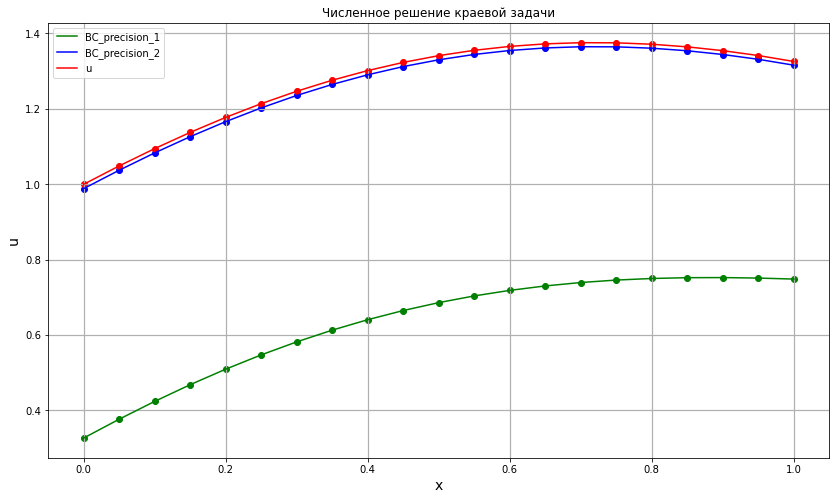

In [22]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(x_plot, y1_plot, color="green")
ax.plot   (x_plot, y1_plot, color="green", label='BC_precision_1')  # BC - boundary conditions

ax.scatter(x_plot, y2_plot, color="blue")
ax.plot   (x_plot, y2_plot, color="blue", label='BC_precision_2')

ax.scatter(x_plot, u_plot, color="red")
ax.plot   (x_plot, u_plot, color="red", label='u')


ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("u", fontsize=14)

plt.title("Численное решение краевой задачи")
plt.legend()

plt.show()

In [23]:
d = {'x_plot': x_plot, 'y1_plot': y1_plot, 'y2_plot': y2_plot, 'u_plot': u_plot}

df = pd.DataFrame(d)
df

,x_plot,y1_plot,y2_plot,u_plot
0,0.00,0.326847,0.988548,1.000000
1,0.05,0.376847,1.037298,1.048709
2,0.10,0.424104,1.083303,1.094673
3,0.15,0.468403,1.126330,1.137661
4,0.20,0.509569,1.166169,1.177462
5,0.25,0.547463,1.202636,1.213891
6,0.30,0.581992,1.235576,1.246793
7,0.35,0.613106,1.264869,1.276048
8,0.40,0.640797,1.290431,1.301567
9,0.45,0.665099,1.312210,1.323301


In [24]:
errors = [abs(y - u) / 0.05 for y, u in zip(y1_plot, u_plot)]
errors

[13.463055540500472,
 13.437228662838653,
 13.41138169407241,
 13.385153118958936,
 13.357867250919071,
 13.32856211826473,
 13.296025736561301,
 13.258837538996287,
 13.215411614935457,
 13.164038676408763,
 13.102924218101139,
 13.030221017965138,
 12.944054810893723,
 12.842542555881446,
 12.723803145115768,
 12.585960642863375,
 12.427140186388193,
 12.245456530972247,
 12.038994867424249,
 11.805782946009348,
 11.543752613986262]

#### Точность алгоритмов

In [25]:
# количество узлов сетки

node_min_count = 10
node_max_count = 1000

In [26]:
# вычисление ошибок

h_plot       = []
errors_plot1 = []
errors_plot2 = []
errors_plot3 = []

for n in np.arange(node_min_count, node_max_count + 1, step=10):    
    
    x0_plot, h = np.linspace(left, right, n, retstep=True)
    
    a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants (x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f)
    a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants (x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)
        
    y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
    y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
    u_plot  = [u(x) for x in x0_plot]
       
    max_error1 = max([abs(y1 - u) for y1, u in zip(y1_plot, u_plot)])
    max_error2 = max([abs(y2 - u) for y2, u in zip(y2_plot, u_plot)])
    
    h_plot.append(h)
    errors_plot1.append(max_error1)
    errors_plot2.append(max_error2)

In [27]:
d = {'h_plot': h_plot, 'errors_plot1': errors_plot1, 'errors_plot2': errors_plot2}

df = pd.DataFrame(d)
df.head(50)

,h_plot,errors_plot1,errors_plot2
0,0.111111,1.060450,0.057437
1,0.052632,0.695709,0.012695
2,0.034483,0.522007,0.005436
3,0.025641,0.418384,0.003003
4,0.020408,0.349271,0.001902
5,0.016949,0.299821,0.001311
6,0.014493,0.262666,0.000959
7,0.012658,0.233719,0.000731
8,0.011236,0.210527,0.000576
9,0.010101,0.191526,0.000466


In [28]:
ln_h_plot       = np.log(h_plot)
ln_errors_plot1 = np.log(errors_plot1)
ln_errors_plot2 = np.log(errors_plot2)

##### МНК для линейной регрессии

In [29]:
ln_errors_plot2 = ln_errors_plot2[:5]
ln_h_plot2      = ln_h_plot[:5]

ln_errors = [ln_errors_plot1, ln_errors_plot2]
b_order1  = 0
b_order2  = 0

    
# b_order1
for index in range(len(ln_h_plot)):
    b_order1 += ln_h_plot[index] * ln_errors[0][index]
b_order1 *= len(ln_h_plot)

b_order1 -= (np.sum(ln_h_plot) * np.sum(ln_errors[0]))
b_order1 /= (len(ln_h_plot) * np.sum(np.power(ln_h_plot, 2)) - np.power(np.sum(ln_h_plot), 2))


# b_order2
for index in range(len(ln_h_plot2)):
    b_order2 += ln_h_plot2[index] * ln_errors[1][index]
b_order2 *= len(ln_h_plot2)

b_order2 -= (np.sum(ln_h_plot2) * np.sum(ln_errors[1]))
b_order2 /= (len(ln_h_plot2) * np.sum(np.power(ln_h_plot2, 2)) - np.power(np.sum(ln_h_plot2), 2))


b_order = [b_order1, b_order2]
b_order

[0.9095166064997257, 2.0109998206945416]

##### График ошибок

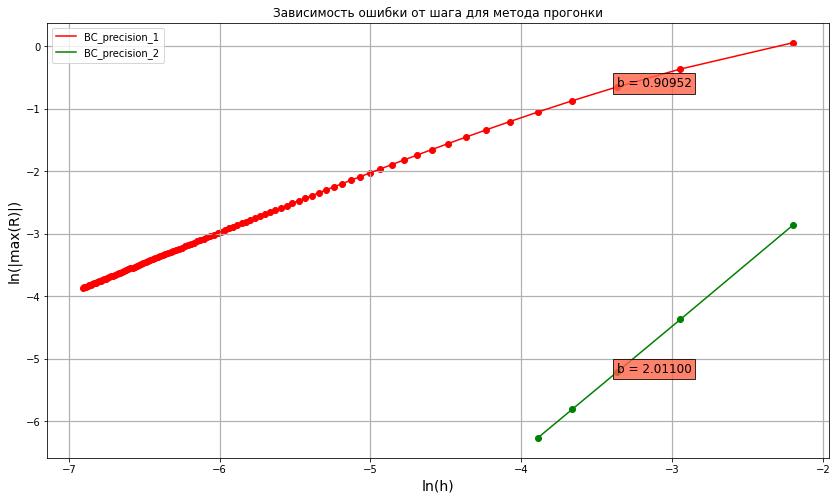

In [30]:
fig, ax = plt.subplots(figsize=(14, 8))

props = dict(boxstyle='square', facecolor='tomato', alpha=0.8)

ax.scatter(ln_h_plot,    ln_errors_plot1, color="red")
ax.plot   (ln_h_plot,    ln_errors_plot1, color="red", label='BC_precision_1')
plt.text  (ln_h_plot[2], ln_errors_plot1[2], "b = {0:.5f}".format(b_order[0]), fontsize = 12, bbox=props)

ax.scatter(ln_h_plot2,    ln_errors_plot2, color="green")
ax.plot   (ln_h_plot2,    ln_errors_plot2, color="green", label='BC_precision_2')
plt.text  (ln_h_plot2[2], ln_errors_plot2[2], "b = {0:.5f}".format(b_order[1]), fontsize = 12, bbox=props)

ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("ln(h)", fontsize=14)        
ax.set_ylabel("ln(|max(R)|)", fontsize=14)

plt.title("Зависимость ошибки от шага для метода прогонки")
plt.legend()

plt.show()